<a href="https://colab.research.google.com/github/F-sic/FaceRecognitionTP/blob/master/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import bz2
import os

from urllib.request import urlopen

def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()
    
    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024)
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)

dst_dir = 'models'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)

    
import numpy as np

TEMPLATE = np.float32([
    (0.0792396913815, 0.339223741112), (0.0829219487236, 0.456955367943),
    (0.0967927109165, 0.575648016728), (0.122141515615, 0.691921601066),
    (0.168687863544, 0.800341263616), (0.239789390707, 0.895732504778),
    (0.325662452515, 0.977068762493), (0.422318282013, 1.04329000149),
    (0.531777802068, 1.06080371126), (0.641296298053, 1.03981924107),
    (0.738105872266, 0.972268833998), (0.824444363295, 0.889624082279),
    (0.894792677532, 0.792494155836), (0.939395486253, 0.681546643421),
    (0.96111933829, 0.562238253072), (0.970579841181, 0.441758925744),
    (0.971193274221, 0.322118743967), (0.163846223133, 0.249151738053),
    (0.21780354657, 0.204255863861), (0.291299351124, 0.192367318323),
    (0.367460241458, 0.203582210627), (0.4392945113, 0.233135599851),
    (0.586445962425, 0.228141644834), (0.660152671635, 0.195923841854),
    (0.737466449096, 0.182360984545), (0.813236546239, 0.192828009114),
    (0.8707571886, 0.235293377042), (0.51534533827, 0.31863546193),
    (0.516221448289, 0.396200446263), (0.517118861835, 0.473797687758),
    (0.51816430343, 0.553157797772), (0.433701156035, 0.604054457668),
    (0.475501237769, 0.62076344024), (0.520712933176, 0.634268222208),
    (0.565874114041, 0.618796581487), (0.607054002672, 0.60157671656),
    (0.252418718401, 0.331052263829), (0.298663015648, 0.302646354002),
    (0.355749724218, 0.303020650651), (0.403718978315, 0.33867711083),
    (0.352507175597, 0.349987615384), (0.296791759886, 0.350478978225),
    (0.631326076346, 0.334136672344), (0.679073381078, 0.29645404267),
    (0.73597236153, 0.294721285802), (0.782865376271, 0.321305281656),
    (0.740312274764, 0.341849376713), (0.68499850091, 0.343734332172),
    (0.353167761422, 0.746189164237), (0.414587777921, 0.719053835073),
    (0.477677654595, 0.706835892494), (0.522732900812, 0.717092275768),
    (0.569832064287, 0.705414478982), (0.635195811927, 0.71565572516),
    (0.69951672331, 0.739419187253), (0.639447159575, 0.805236879972),
    (0.576410514055, 0.835436670169), (0.525398405766, 0.841706377792),
    (0.47641545769, 0.837505914975), (0.41379548902, 0.810045601727),
    (0.380084785646, 0.749979603086), (0.477955996282, 0.74513234612),
    (0.523389793327, 0.748924302636), (0.571057789237, 0.74332894691),
    (0.672409137852, 0.744177032192), (0.572539621444, 0.776609286626),
    (0.5240106503, 0.783370783245), (0.477561227414, 0.778476346951)])

TPL_MIN, TPL_MAX = np.min(TEMPLATE, axis=0), np.max(TEMPLATE, axis=0)
MINMAX_TEMPLATE = (TEMPLATE - TPL_MIN) / (TPL_MAX - TPL_MIN)    

In [0]:
!apt update
!apt install -y cmake
!pip install dlib

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Fetched 163 kB in 1s (123 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
10 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Read

In [0]:
!rm -R images.zip
!wget http://www.eyrignoux.com.fr/coursIA/deepLearning/images.zip
!unzip images.zip

--2018-12-11 10:14:20--  http://www.eyrignoux.com.fr/coursIA/deepLearning/images.zip
Resolving www.eyrignoux.com.fr (www.eyrignoux.com.fr)... 62.210.16.62
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1345397 (1.3M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]   1.28M  --.-KB/s    in 0.1s    

2018-12-11 10:14:20 (9.06 MB/s) - ‘images.zip’ saved [1345397/1345397]

Archive:  images.zip
replace images/Vladimir_Putin/Vladimir_Putin_0010.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
INNER_EYES_AND_BOTTOM_LIP = [39 , 42,  57]
OUTER_EYES_AND_NOSE = [36 , 45 , 33]

import dlib
face_detector = dlib.get_frontal_face_detector()
keypoints_predictor = dlib.shape_predictor('models/landmarks.dat')

def getAllFaceBoundingBoxes(rgbImg):
    # Return all face bounding boxes in an image.  
    assert rgbImg is not None
    try:        
        # make everything bigger to detect more faces.
        return face_detector(rgbImg, 1) 
    except Exception as e:
        print("Warning: {}".format(e))
        return []
      

def getLargestFaceBoundingBox(rgbImg, skipMulti=False):  
    # Return the biggest bounding box found in faces
    assert rgbImg is not None
    faces = getAllFaceBoundingBoxes(rgbImg)
    # Skip image if more than one face detected.
    if (not skipMulti and len(faces) > 0) or len(faces) == 1:
        # faces is a list of bounding boxes
        return max(faces, key=lambda rect: rect.width() * rect.height()) ## rect.area()
    else:
        return None

def findLandmarks(rgbImg, bb):
  # list of (x,y) 
  assert rgbImg is not None
  assert bb is not None
  points = keypoints_predictor(rgbImg, bb)
  return list(map(lambda p: (p.x, p.y), points.parts()))



import cv2
import numpy as np

# Transform and align a face in an image.
def align(imgDim, rgbImg, bb=None, landmarks=None, landmarkIndices=INNER_EYES_AND_BOTTOM_LIP, skipMulti=False):
    assert imgDim is not None
    assert rgbImg is not None
    assert landmarkIndices is not None
    if bb is None:
        bb = getLargestFaceBoundingBox(rgbImg, skipMulti)
        if bb is None:
            return

    if landmarks is None:
        landmarks = findLandmarks(rgbImg, bb)

    npLandmarks = np.float32(landmarks)
    npLandmarkIndices = np.array(landmarkIndices)

    # It extracts a small image of size imgDim x imgDim pixels,
    H = cv2.getAffineTransform(npLandmarks[npLandmarkIndices], imgDim * MINMAX_TEMPLATE[npLandmarkIndices])
    # containing only the aligned face
    thumbnail = cv2.warpAffine(rgbImg, H, (imgDim, imgDim))

    return thumbnail

###Test the face alignment: 2 points
To demonstrate face recognition on a custom dataset, a small subset of the [LFW](http://vis-www.cs.umass.edu/lfw/) dataset is used. We select 10 images of 10 celebrities, which makes a dataset of 100 images. The metadata for each image (file and identity name) are loaded into memory for later processing.

In [0]:
import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('images')


import cv2

def load_image(path):
    img = cv2.imread(path)
    # in BGR order. So we need to reverse them, in order to get RGB.
    return img[...,::-1]
  


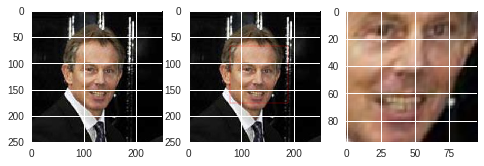

In [0]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

EMBEDDING_VECTOR_SIZE = 128
FACE_IMG_SIZE = 96

img_number = random.randint(0, len(metadata)-1)
img = load_image(metadata[img_number].image_path())
bb = getLargestFaceBoundingBox(img)
img_aligned = align(FACE_IMG_SIZE, img,bb,landmarkIndices=OUTER_EYES_AND_NOSE )

plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))
plt.subplot(133)
plt.imshow(img_aligned);

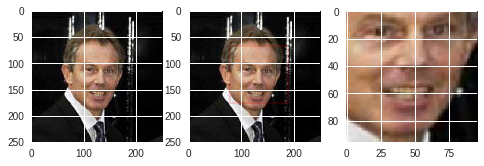

In [0]:
img_aligned2 = align(FACE_IMG_SIZE, img,bb)

plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))
plt.subplot(133)
plt.imshow(img_aligned2);

### Possible improvements: 1 point
Run the test several times. You should find at least 2 ideas of improvements. Please state them (0.5 point by idea, you can find more than 2)

FACE_IMG_SIZE = 128

landmarkIndices = INNER_EYES_AND_BOTTOM_LIP



#Face embedding: 8 points
"transform" the face image into a vector of 128 numbers "as representative as possible" from that face.





###CNN architecture: 6 points

The most important here is the top layer, which is referred to as the *embedding layer* from which the 128-dimensional embedding vectors can be obtained. 



In [0]:
import tensorflow as tf

## This function defines a layer that does not exist in Keras, which is needed in the Inception neural network.
def LRN2D(x):
  return tf.nn.lrn(x, alpha=1e-4, beta=0.75)


from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D


In [0]:

# Here we use the functional API of Keras, see an example here: https://keras.io/getting-started/functional-api-guide/
def create_first_layers():
    myInput =Input(shape=(FACE_IMG_SIZE, FACE_IMG_SIZE,3))

    x = ZeroPadding2D(padding=(3, 3))(myInput)     # (padding=(3, 3), input_shape=(96, 96, 3))(myInput)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)
    x = Lambda(LRN2D, name='lrn_1')(x)
    x = Conv2D(64, (1, 1), name='conv2')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = Conv2D(192, (3, 3), name='conv3')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
    x = Activation('relu')(x)
    x = Lambda(LRN2D, name='lrn_2')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)

    return myInput, x

In [0]:
def create_inception_3a(x):
  
    # Inception3a
    inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
    inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
    inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
    inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
    inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
    inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
    inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

    inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
    inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
    inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
    inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
    inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
    inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
    inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

    inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
    inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
    inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
    inception_3a_pool = Activation('relu')(inception_3a_pool)
    inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

    inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
    inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
    inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

    inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

    return inception_3a
  

In [0]:
def create_inception_3b(inception_3a):
    # Inception3b: reproduce Inception3a, but for the names of the layers: replace 'a' by 'b' in the names.
    # Example: the name 'inception_3a_3x3_conv1' becomes 'inception_3b_3x3_conv1'
    # BE CAREFUL: the MaxPooling2D of inception_3a_pool must be replaced by an AveragePooling2D in inception_3b_pool
    inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
    inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
    inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
    inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
    inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
    inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
    inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

    inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
    inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
    inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
    inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
    inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
    inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
    inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

    inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3a)
    inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
    inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
    inception_3b_pool = Activation('relu')(inception_3b_pool)
    inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

    inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
    inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
    inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

    inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

    return inception_3b

In [0]:
def create_inception_3c(inception_3b):
  
    inception_3c_3x3 = Conv2D( 128,(1,1), name='inception_3c_3x3_conv1')(inception_3b) 
    inception_3c_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_3c_3x3_bn1')(inception_3c_3x3)
    inception_3c_3x3 = Activation('relu')(inception_3c_3x3)
    inception_3c_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3c_3x3)
    inception_3c_3x3 = Conv2D( 256,(3,3), strides=(2, 2), name='inception_3c_3x3_conv2')(inception_3c_3x3)
    inception_3c_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_3c_3x3_bn2')(inception_3c_3x3)
    inception_3c_3x3 = Activation('relu')(inception_3c_3x3)

    inception_3c_5x5 = Conv2D( 32, (1,1), name='inception_3c_5x5_conv1')(inception_3b)
    inception_3c_5x5 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_3c_5x5_bn1')(inception_3c_5x5)
    inception_3c_5x5 = Activation('relu')(inception_3c_5x5) 
    inception_3c_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3c_5x5)
    inception_3c_5x5 = Conv2D(64,(5,5), strides=(2, 2), name='inception_3c_5x5_conv2')(inception_3c_5x5)
    inception_3c_5x5 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_3c_5x5_bn2')(inception_3c_5x5)
    inception_3c_5x5 = Activation('relu')(inception_3c_5x5)
    
    inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
    inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)
    
    inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

    return inception_3c

In [0]:
def create_inception_4a(inception_3c):
    #inception 4a    
    inception_4a_3x3 = Conv2D(96,(1,1), name='inception_4a_3x3_conv1')(inception_3c) 
    inception_4a_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_4a_3x3_bn1')(inception_4a_3x3)
    inception_4a_3x3 = Activation('relu')(inception_4a_3x3)
    inception_4a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4a_3x3)
    inception_4a_3x3 = Conv2D(192,(3,3), name='inception_4a_3x3_conv2')(inception_4a_3x3)
    inception_4a_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_4a_3x3_bn2')(inception_4a_3x3)
    inception_4a_3x3 = Activation('relu')(inception_4a_3x3)

    inception_4a_5x5 = Conv2D(32, (1,1), name='inception_4a_5x5_conv1')(inception_3c)
    inception_4a_5x5 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_4a_5x5_bn1')(inception_4a_5x5)
    inception_4a_5x5 = Activation('relu')(inception_4a_5x5) 
    inception_4a_5x5 = ZeroPadding2D(padding=(2,2))(inception_4a_5x5)
    inception_4a_5x5 = Conv2D(64, (5,5),  name='inception_4a_5x5_conv2')(inception_4a_5x5)
    inception_4a_5x5 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_4a_5x5_bn2')(inception_4a_5x5)
    inception_4a_5x5 = Activation('relu')(inception_4a_5x5)

    inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3c)
    inception_4a_pool = Conv2D( 128, (1,1), name='inception_4a_pool_conv')(inception_4a_pool) 
    inception_4a_pool = BatchNormalization( axis=3, epsilon=0.00001, name='inception_4a_pool_bn')(inception_4a_pool) 
    inception_4a_pool = Activation('relu')(inception_4a_pool)
    inception_4a_pool = ZeroPadding2D(padding=(2, 2))(inception_4a_pool)
  
  
    ## inception_4a_1x1 = ## YOUR CODE HERE
    inception_4a_1x1 = Conv2D(256, (1,1), name='inception_4a_1x1_conv')(inception_3c)
    inception_4a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_1x1_bn')(inception_4a_1x1)
    inception_4a_1x1 = Activation('relu')(inception_4a_1x1)
    
    inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

    return inception_4a

In [0]:
def create_inception_4e(inception_4a):
    #inception4e    
    inception_4e_3x3 = Conv2D( 160, (1,1), name='inception_4e_3x3_conv1')(inception_4a) 
    inception_4e_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_4e_3x3_bn1')(inception_4e_3x3)
    inception_4e_3x3 = Activation('relu')(inception_4e_3x3)
    inception_4e_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4e_3x3)
    inception_4e_3x3 = Conv2D(256,(3,3), strides=(2, 2),  name='inception_4e_3x3_conv2')(inception_4e_3x3)
    inception_4e_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_4e_3x3_bn2')(inception_4e_3x3)
    inception_4e_3x3 = Activation('relu')(inception_4e_3x3)

    inception_4e_5x5 = Conv2D( 64, (1,1), name='inception_4e_5x5_conv1')(inception_4a)
    inception_4e_5x5 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_4e_5x5_bn1')(inception_4e_5x5)
    inception_4e_5x5 = Activation('relu')(inception_4e_5x5) 
    inception_4e_5x5 = ZeroPadding2D(padding=(2, 2))(inception_4e_5x5)
    inception_4e_5x5 = Conv2D( 128,(5,5), strides=(2, 2), name='inception_4e_5x5_conv2')(inception_4e_5x5)
    inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn2')(inception_4e_5x5)
    inception_4e_5x5 = Activation('relu')(inception_4e_5x5)
    
    inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
    inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

    inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

    return inception_4e

In [0]:
def create_inception_5a(inception_4e):
    #inception5a
    inception_5a_3x3 = Conv2D(96,(1,1), name='inception_5a_3x3_conv1')(inception_4e) 
    inception_5a_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_5a_3x3_bn1')(inception_5a_3x3)
    inception_5a_3x3 = Activation('relu')(inception_5a_3x3)
    inception_5a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_5a_3x3)
    inception_5a_3x3 = Conv2D( 384,(3,3), name='inception_5a_3x3_conv2')(inception_5a_3x3)
    inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn2')(inception_5a_3x3)
    inception_5a_3x3 = Activation('relu')(inception_5a_3x3)

    inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4e)
    inception_5a_pool = Conv2D( 96, (1,1), name='inception_5a_pool_conv')(inception_5a_pool) 
    inception_5a_pool = BatchNormalization( axis=3, epsilon=0.00001, name='inception_5a_pool_bn')(inception_5a_pool) 
    inception_5a_pool = Activation('relu')(inception_5a_pool)
    inception_5a_pool = ZeroPadding2D(padding=(1, 1))(inception_5a_pool)
    
    inception_5a_1x1 = Conv2D( 256,(1,1), name='inception_5a_1x1_conv')(inception_4e)
    inception_5a_1x1 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_5a_1x1_bn')(inception_5a_1x1)
    inception_5a_1x1 = Activation('relu')(inception_5a_1x1)

    inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

    return inception_5a

In [0]:
  def create_inception_5b(inception_5a):
    #inception_5b
    inception_5b_3x3 = Conv2D(96, (1,1), name='inception_5b_3x3_conv1')(inception_5a) 
    inception_5b_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_5b_3x3_bn1')(inception_5b_3x3)
    inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
    inception_5b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_5b_3x3)
    inception_5b_3x3 = Conv2D( 384,(3,3),  name='inception_5b_3x3_conv2')(inception_5b_3x3)
    inception_5b_3x3 = BatchNormalization( axis=3, epsilon=0.00001, name='inception_5b_3x3_bn2')(inception_5b_3x3)
    inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
    
    inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)
    inception_5b_pool = Conv2D(96, (1,1), name='inception_5b_pool_conv')(inception_5b_pool) 
    inception_5b_pool = BatchNormalization( axis=3, epsilon=0.00001, name='inception_5b_pool_bn')(inception_5b_pool) 
    inception_5b_pool = Activation('relu')(inception_5b_pool)
    inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

    inception_5b_1x1 = Conv2D( 256,(1,1), name='inception_5b_1x1_conv')(inception_5a)
    inception_5b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_1x1_bn')(inception_5b_1x1)
    inception_5b_1x1 = Activation('relu')(inception_5b_1x1)
    inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

    return inception_5b

In [0]:
from keras.models import Model
from keras import backend as K

def create_model():
    myInput, x = create_first_layers()
    inception_3a = create_inception_3a(x)
    inception_3b = create_inception_3b(inception_3a)
    inception_3c = create_inception_3c(inception_3b)
    inception_4a = create_inception_4a(inception_3c)
    inception_4e = create_inception_4e(inception_4a)
    inception_5a = create_inception_5a(inception_4e)
    inception_5b = create_inception_5b(inception_5a)
    av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
    reshape_layer = Flatten()(av_pool)
    dense_layer = Dense(128, name='dense_layer')(reshape_layer)
    norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)
    return Model(inputs=[myInput], outputs=norm_layer)

In [0]:
nn4_small2 = create_model()

###Triplet loss: 1 point


In [0]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(FACE_IMG_SIZE, FACE_IMG_SIZE, 3))
in_p = Input(shape=(FACE_IMG_SIZE, FACE_IMG_SIZE, 3))
in_n = Input(shape=(FACE_IMG_SIZE, FACE_IMG_SIZE, 3))

# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = nn4_small2(in_a)
emb_p = nn4_small2(in_p)
emb_n = nn4_small2(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer')([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)

In [0]:

def triplet_generator():
    ''' Dummy triplet generator for API usage demo only.
    Will be replaced by a version that uses real image data later.
    :return: a batch of (anchor, positive, negative) triplets
    '''
    while True:
        a_batch = np.random.rand(4, 96, 96, 3)
        p_batch = np.random.rand(4, 96, 96, 3)
        n_batch = np.random.rand(4, 96, 96, 3)
        yield [a_batch , p_batch, n_batch], None

In [0]:
generator = triplet_generator() 

nn4_small2_train.compile(loss=None, optimizer='adam')
nn4_small2_train.fit_generator(generator, epochs=10, steps_per_epoch=100)

Epoch 1/10
100/100 [==============================] - 40s 403ms/step - loss: 0.7933
Epoch 2/10
100/100 [==============================] - 19s 193ms/step - loss: 0.8028
Epoch 3/10
100/100 [==============================] - 19s 194ms/step - loss: 0.8003
Epoch 4/10
100/100 [==============================] - 19s 193ms/step - loss: 0.8010
Epoch 5/10
100/100 [==============================] - 19s 193ms/step - loss: 0.8000
Epoch 6/10
100/100 [==============================] - 19s 195ms/step - loss: 0.7996
Epoch 7/10
100/100 [==============================] - 19s 193ms/step - loss: 0.8009
Epoch 8/10
100/100 [==============================] - 20s 195ms/step - loss: 0.7998
Epoch 9/10
100/100 [==============================] - 20s 196ms/step - loss: 0.8004
Epoch 10/10
100/100 [==============================] - 19s 194ms/step - loss: 0.7998


###Load pre-trained weights: 1 point

The OpenFace project provides [pre-trained models](https://cmusatyalab.github.io/openface/models-and-accuracies/#pre-trained-models) that were trained with the public face recognition datasets [FaceScrub](http://vintage.winklerbros.net/facescrub.html) and [CASIA-WebFace](http://arxiv.org/abs/1411.7923). The Keras-OpenFace project converted the weights of the pre-trained nn4.small2.v1 model to [CSV files](https://github.com/iwantooxxoox/Keras-OpenFace/tree/master/weights) which were then [converted here](face-recognition-convert.ipynb) to a binary format that can be loaded by Keras with `load_weights`:

In [0]:
!mkdir weights
!wget http://www.eyrignoux.com.fr/coursIA/deepLearning/nn4.small2.v1.h5 -P weights

mkdir: cannot create directory ‘weights’: File exists
--2018-12-11 10:25:43--  http://www.eyrignoux.com.fr/coursIA/deepLearning/nn4.small2.v1.h5
Resolving www.eyrignoux.com.fr (www.eyrignoux.com.fr)... 62.210.16.62
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15300744 (15M)
Saving to: ‘weights/nn4.small2.v1.h5.1’

nn4.small2.v1.h5.1  100%[===================>]  14.59M  24.2MB/s    in 0.6s    

2018-12-11 10:25:45 (24.2 MB/s) - ‘weights/nn4.small2.v1.h5.1’ saved [15300744/15300744]



In [0]:
nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('weights/nn4.small2.v1.h5')

##Face recognition: 5 points
Our CNN is initialized with weights trained with the public face recognition datasets [FaceScrub](http://vintage.winklerbros.net/facescrub.html) and [CASIA-WebFace](http://arxiv.org/abs/1411.7923), during several days or weeks. Now it is able to compute similar embedding vectors for similar faces, and dissimilar embedding vectors for dissimilar faces, because it learnt to differentiate faces very accurately.

Now, let's suppose that you want to identify only a small set of people, let's say 10 persons: for example yourself, some of your friends, and a few members of your familly. Let's suppose that you have around 10 images per people that you want to identify. It makes a dataset of 10x10 = 100 images.

Here is what you have to do:
- Using the CNN, compute the embedding vector of each of your 100 images
- If the CNN works, the embedding vectors of the images of one person should be close to eachother in terms of euclidian distance, and the embedding vectors of other persons should be far away
- You simply have to evaluate the "average size" of a group of vectors representing one person. 
- When you want to identify a new face, you have to compute its embedding vector using the CNN, and check if it is "near enough" to the embeddings of the persons that you have in your dataset (ie. below the threshold that you just computed above).

###Compute embedding vectors for all the images of our dataset: 1 point

In [0]:
embedded = np.zeros((metadata.shape[0], EMBEDDING_VECTOR_SIZE))

for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    img = align(FACE_IMG_SIZE, img , landmarkIndices=OUTER_EYES_AND_NOSE)
    # normalize : scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    # obtain embedding vector for image
    embedded[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]

Let's verify on a single triplet example that the squared L2 distance between its anchor-positive pair is smaller than the distance between its anchor-negative pair.

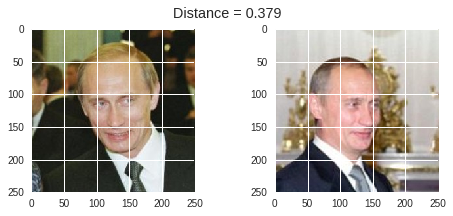

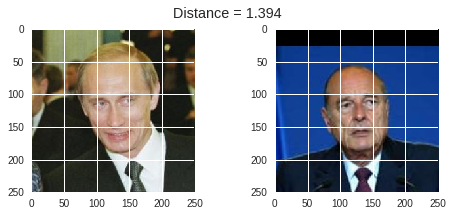

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embedded[idx1], embedded[idx2]):.3f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(48, 40)
show_pair(48, 60)

###Face recognition by Distance threshold: 1 point

To find the optimal value for $\tau$, the face verification performance must be evaluated on a range of distance threshold values. At a given threshold, all possible embedding vector pairs are classified as either *same identity* or *different identity* and compared to the ground truth. Since we're dealing with skewed classes (much more negative pairs than positive pairs), we use the [F1 score](https://en.wikipedia.org/wiki/F1_score) as evaluation metric instead of [accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

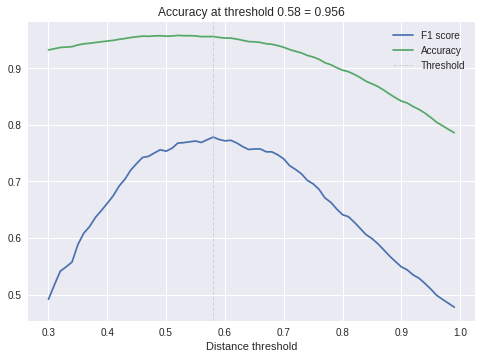

In [0]:
from sklearn.metrics import f1_score, accuracy_score

distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(metadata)

for i in range(num - 1):
    for j in range(1, num):
        dist = distance(embedded[i], embedded[j])
        distances.append(dist)
        identical.append(1 if metadata[i].name == metadata[j].name else 0)
        
distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(0.3, 1.0, 0.01) ## list of possible thresholds between 0.3 and 1.0, by steps of 0.01

# For each possible threshold:
# distances < threshold returns a vector of booleans: for each dist in distances, the boolean says if the dist is below the threshold
# f1_score(identical, distances < threshold) returns the f1_score between the "ground truth" (the vector called 'identical') and the results
#    found by using the specific threshold called 'threshold'
f1_scores = [f1_score(identical, distances < t) for t in thresholds]## compute the F1 score for each element of thresholds
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]## compute the accuracy score for each element of thresholds

opt_idx = np.argmax(f1_scores)## indice of the the best threshold : biggest element of f1_scores 

# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]

# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();

The face verification accuracy at $\tau$ = 0.56 is 95.7%. This is not bad given a baseline of 89% for a classifier that always predicts *different identity* (there are 980 pos. pairs and 8821 neg. pairs) but since nn4.small2.v1 is a relatively small model it is still less than what can be achieved by state-of-the-art models (> 99%). 

The following two histograms show the distance distributions of positive and negative pairs and the location of the decision boundary. There is a clear separation of these distributions which explains the discriminative performance of the network. One can also spot some strong outliers in the positive pairs class but these are not further analyzed here.

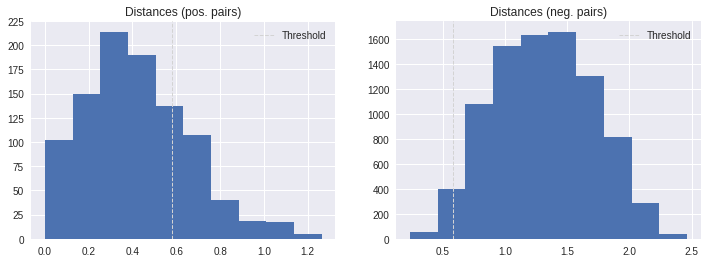

In [0]:
dist_pos = distances[identical == 1]
dist_neg = distances[identical == 0]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(dist_pos)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (pos. pairs)')
plt.legend();

plt.subplot(122)
plt.hist(dist_neg)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('Distances (neg. pairs)')
plt.legend();

Given an estimate of the distance threshold $\tau$, face recognition is now as simple as calculating the distances between an input embedding vector and all embedding vectors in a database. The input is assigned the label (i.e. identity) of the database entry with the smallest distance if it is less than $\tau$ or label *unknown* otherwise. This procedure can also scale to large databases as it can be easily parallelized. It also supports one-shot learning, as adding only a single entry of a new identity might be sufficient to recognize new examples of that identity.

### Face recognition with KNN or SVM: 2 points



A more robust approach is to label the input using the top $k$ scoring entries in the database which is essentially [KNN classification](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) with a Euclidean distance metric. Alternatively, a linear [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) (SVM) can be trained with the database entries and used to classify i.e. identify new inputs. For training these classifiers we use 50% of the dataset, for evaluation the other 50%.

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

targets = np.array([m.name for m in metadata])

## give numeric values to the targets (ie. the names of the persons of the dataset)
encoder = LabelEncoder()
encoder.fit(targets)
y = encoder.transform(targets)# Numeric values of the names of the persons in the dataset

train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

# 50 examples of 10 identities (5 examples each)
X_train = embedded[train_idx]
# 50 examples of 10 identities (5 examples each)
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean') ## YOUR CODE HERE: instanciate a KNeighborsClassifier, with n_neighbors=1
      ## Select metric='euclidean', since we worked with that formula until now, when computing distances between vectors.
svc = LinearSVC() ## YOUR CODE HERE: instanciate a LinearSVC

## YOUR CODE HERE: fit your knn and your svc on the training set, using X_train and y_train
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
acc_knn = accuracy_score(y_test, knn.predict(X_test)) ## YOUR CODE HERE: compute the accuracy_score of your knn on the test set
acc_svc = accuracy_score(y_test, svc.predict(X_test)) ## YOUR CODE HERE: compute the accuracy_score of your svc on the test set

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')

KNN accuracy = 0.94, SVM accuracy = 1.0


The KNN classifier achieves an accuracy of 96% on the test set, the SVM classifier 98%. Let's use the SVM classifier to illustrate face recognition on a single example.

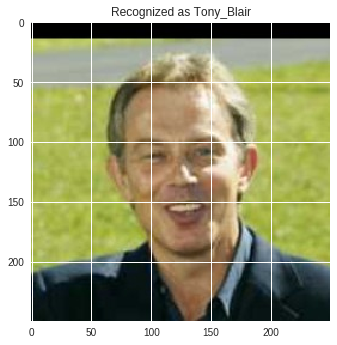

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx =  random.randint(0, len(X_test)-1)
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embedded[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Recognized as {example_identity}');

Seems reasonable :-) Classification results should actually be checked whether (a subset of) the database entries of the predicted identity have a distance less than $\tau$, otherwise one should assign an *unknown* label. This step is skipped here but can be easily added.



### Dataset visualization

To embed the dataset into 2D space for displaying identity clusters, [t-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (t-SNE) is applied to the 128-dimensional embedding vectors. Except from a few outliers, identity clusters are well separated.

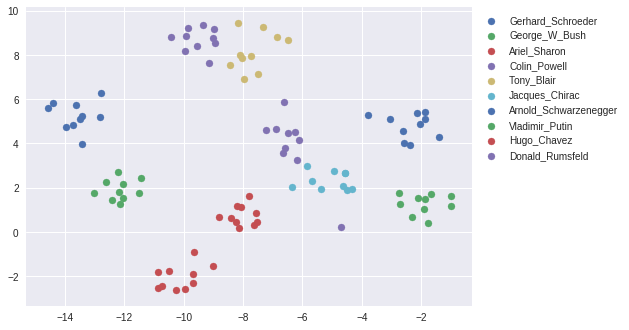

In [0]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(embedded)

for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));

###Possible improvements: 1 point
Find at least 1 possible improvement on what we did in that section: 0.5 point

Try it and check if it improves the results: 0.5 point

##Try with your own dataset: 2 points
Create your own dataset (you, your friends, other celebrities...), use it in place of ours, and see if it works.

If it does not work, do you have any idea why ? This question is the most interesting of all, since you are now using "true data", not a curated dataset.

In [0]:
!wget https://github.com/F-sic/photoIA_Testing/archive/master.zip -O photo.zip
!unzip photo.zip 

--2018-12-11 10:26:23--  https://github.com/F-sic/photoIA_Testing/archive/master.zip
Resolving github.com (github.com)... 140.82.118.3, 140.82.118.4
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/F-sic/photoIA_Testing/zip/master [following]
--2018-12-11 10:26:23--  https://codeload.github.com/F-sic/photoIA_Testing/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120, 192.30.253.121
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘photo.zip’

photo.zip               [   <=>              ]   3.64M  5.62MB/s    in 0.6s    

2018-12-11 10:26:24 (5.62 MB/s) - ‘photo.zip’ saved [3819274]

Archive:  photo.zip
8da17468c1701c389af84fc9e66d3682d3fe37be
replace photoIA_Testing-master/brad_pitt/brad_pitt_0001.jpg? [y]es, [n]o

In [0]:
# metadata = load_metadata('images')
metadata = load_metadata('photoIA_Testing-master')
EMBEDDING_VECTOR_SIZE = 128
FACE_IMG_SIZE = 96

nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('weights/nn4.small2.v1.h5')

In [0]:
# feeding the aligned and scaled images into the pre-trained network.
embedded = np.zeros((metadata.shape[0], EMBEDDING_VECTOR_SIZE))
for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    img = align(FACE_IMG_SIZE, img , landmarkIndices=OUTER_EYES_AND_NOSE)
    img = (img / 255.).astype(np.float32)
    embedded[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
encoder.fit(targets)
y = encoder.transform(targets)

train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

X_train = embedded[train_idx]
X_test = embedded[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

svc = LinearSVC() 
svc.fit(X_train, y_train)

acc_svc = accuracy_score(y_test, svc.predict(X_test)) 
print(f' SVM accuracy = {acc_svc}')

In [0]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(embedded)

for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx =  random.randint(0, len(X_test)-1)
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc.predict([embedded[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Recognized as {example_identity}');

### References

- [1] [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/abs/1503.03832)
- [2] [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)